# Desafio Python e SQL

### Nesse desafio, vamos fazer uma consulta em SQL com uma condição e fazer o tratamento das informações no Python usando o pandas

- Calcule o lucro diário da empresa 

- Tabela com as Vendas -> dbo.FactSales
- Lucro é -> Sales Amount - TotalCost - DiscountAmount
- Lembre que podemos ter mais de 1 transação por dia na tabela, então uma opção é usar o método groupby do pandas
- Sugestão para ajudar na análise é plotar um gráfico do lucro diário

In [2]:
import pyodbc
import pandas as pd
dados_conexao = ("Driver={ODBC Driver 17 for SQL Server};"
                "Server=HueccoMundo;"
                "Database=ContosoRetailDW;"
                "Trusted_Connection=yes;")

conexao = pyodbc.connect(dados_conexao)
print("Conexao bem-sucedida")

Conexao bem-sucedida


In [3]:
vendas_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', conexao)
display(vendas_df)

C:\Users\Peu\AppData\Local\Temp\ipykernel_12260\2700603749.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vendas_df = pd.read_sql('SELECT * FROM ContosoRetailDW.dbo.FactSales', conexao)


,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01


In [11]:
vendas_df['Lucro'] = vendas_df['SalesAmount'] - vendas_df['TotalCost'] - vendas_df['DiscountAmount']
display(vendas_df)

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate,Lucro
0,1,2007-01-02,1,209,956,10,1,91.05,198.00,8,0,0.00,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01,776.40
1,2,2007-02-12,4,308,766,2,1,10.15,19.90,4,0,0.00,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01,37.01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.00,9,0,0.00,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01,1685.73
3,4,2008-01-13,2,306,1429,10,1,132.90,289.00,8,0,0.00,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01,1133.20
4,5,2008-01-22,2,306,1133,10,1,144.52,436.20,24,0,0.00,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01,6476.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406084,3406085,2007-10-09,1,121,920,1,1,0.48,0.95,5,0,0.00,0,0.000,2.40,4.750,1,2010-01-01,2010-01-01,2.35
3406085,3406086,2007-07-08,1,89,1202,3,1,330.66,998.00,12,0,0.00,0,0.000,3967.92,11976.000,1,2010-01-01,2010-01-01,8008.08
3406086,3406087,2009-03-06,2,307,1361,24,1,16.56,49.99,18,1,49.99,5,49.990,281.52,849.830,1,2010-01-01,2010-01-01,518.32
3406087,3406088,2007-02-04,1,55,539,2,1,760.38,2295.00,9,0,0.00,3,344.250,6843.42,20310.750,1,2010-01-01,2010-01-01,13123.08


In [22]:
# Imprimindo o datekey em ordem
vendas_df.sort_values(['DateKey'])

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate,Lucro
117502,117503,2007-01-01,1,64,2125,2,1,83.10,163.00,4,0,0.0,1,8.150,332.40,643.850,1,2010-01-01,2010-01-01,303.30
153599,153600,2007-01-01,1,302,1505,5,1,105.77,230.00,13,0,0.0,1,34.500,1375.01,2955.500,1,2010-01-01,2010-01-01,1545.99
3113147,3113148,2007-01-01,2,307,484,5,1,65.77,129.00,12,0,0.0,7,135.450,789.24,1412.550,1,2010-01-01,2010-01-01,487.86
282172,282173,2007-01-01,1,161,1009,2,1,86.68,188.50,9,0,0.0,1,9.425,780.12,1687.075,1,2010-01-01,2010-01-01,897.53
733306,733307,2007-01-01,1,30,1664,2,1,4.13,8.99,45,0,0.0,0,0.000,185.85,404.550,1,2010-01-01,2010-01-01,218.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227598,3227599,2009-12-31,1,142,439,22,1,257.06,559.00,13,0,0.0,1,111.800,3341.78,7155.200,1,2010-01-01,2010-01-01,3701.62
2906780,2906781,2009-12-31,1,150,1374,22,1,8.16,16.00,26,0,0.0,2,6.400,212.16,409.600,1,2010-01-01,2010-01-01,191.04
1363974,1363975,2009-12-31,1,276,1344,23,1,8.16,16.00,26,0,0.0,1,2.400,212.16,413.600,1,2010-01-01,2010-01-01,199.04
328184,328185,2009-12-31,1,273,576,23,1,827.97,2499.00,6,0,0.0,3,1124.550,4967.82,13869.450,1,2010-01-01,2010-01-01,7777.08


In [23]:
vendas_lucro_diario = vendas_df.groupby(['DateKey']).sum()
display(vendas_lucro_diario['Lucro'])

C:\Users\Peu\AppData\Local\Temp\ipykernel_12260\793603047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_lucro_diario = vendas_df.groupby(['DateKey']).sum()


DateKey
2007-01-01    4.446594e+06
2007-01-02    4.423362e+06
2007-01-03    4.515993e+06
2007-01-04    4.447113e+06
2007-01-05    4.338266e+06
                  ...     
2009-12-27    5.438840e+06
2009-12-28    5.273078e+06
2009-12-29    5.523555e+06
2009-12-30    5.399371e+06
2009-12-31    5.513426e+06
Name: Lucro, Length: 1096, dtype: float64

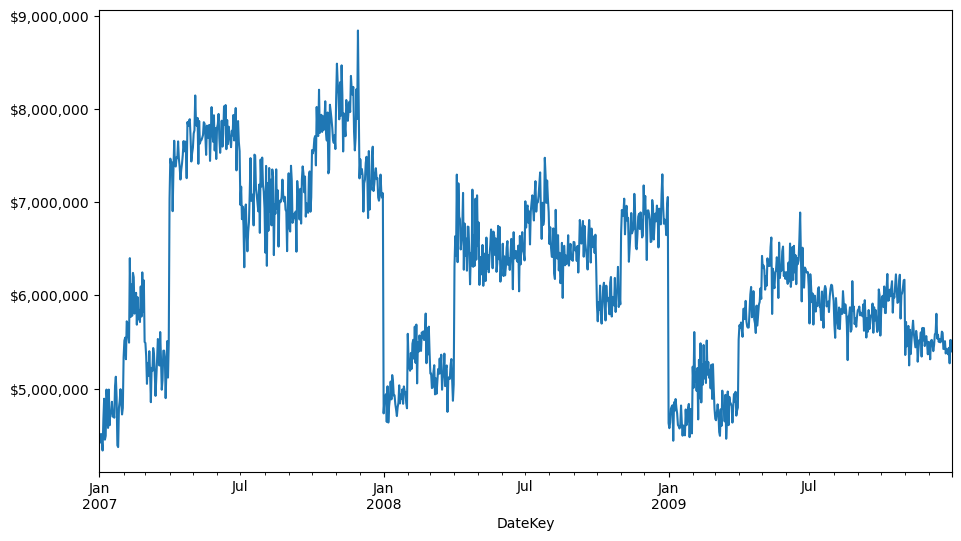

In [58]:
import matplotlib
import matplotlib.pyplot as plt
grafico = vendas_lucro_diario['Lucro'].plot(figsize=(11,6))
grafico.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()
